In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("latest_calls.csv")
df.time = pd.to_datetime(df.time)

In [7]:
df.sort_values(by="time", inplace=True)

In [8]:
df.head()

,Unnamed: 0,x,y,blkaddr,offense,time
11,11,-122.256304,37.863443,2600 PARKER ST,ROBBERY,2019-04-20 00:02:00
15,15,-122.262993,37.864535,DWIGHT WY & ELLSWORTH ST,ROBBERY,2019-04-20 00:25:00
14,14,-122.281929,37.881687,MONTEREY AV & HOPKINS ST,ROBBERY,2019-04-20 07:40:00
9,9,-122.311155,37.865172,UNIVERSITY AV & MARINA BL,VEHICLE STOLEN,2019-04-20 08:35:00
2,2,-122.259260,37.859528,TELEGRAPH AV & STUART ST,VANDALISM,2019-04-20 08:36:00


In [9]:
# df[df["offense"]=="ROBBERY"]
#find the time between crimes within a given radius
def distances(x1, y1, x2s, y2s):
    return np.sqrt(np.power((x2s-x1), 2)+np.power((y2s-y1),2))
# for row in df.iterrows:
#     #find crimes in the radius:
#     in_radius = df[distance(row.x, row.y, df.x, df.y) < .03]

In [15]:
within2600parker = df[distances(df.iloc[1].x, df.iloc[1].y, df.x, df.y) < .003]

In [16]:
within2600parker.time.diff().mean()

Timedelta('1 days 18:09:21.386138')

In [11]:
rw2p = within2600parker[within2600parker.offense=="ROBBERY"]

In [12]:
rw2p.time.diff().mean()

Timedelta('23 days 11:18:25.714285')

In [99]:
rw2p

,Unnamed: 0,x,y,blkaddr,offense,time
11,11,-122.256304,37.863443,2600 PARKER ST,ROBBERY,2019-04-20 00:02:00
106,109,-122.255235,37.865535,2500 BENVENUE AV,ROBBERY,2019-04-24 22:15:00
731,759,-122.258577,37.864827,2500 TELEGRAPH AVE,ROBBERY,2019-05-20 21:49:00
1251,1297,-122.256180,37.865420,2600 DWIGHT WY,ROBBERY,2019-06-11 22:20:00
1834,1904,-122.258577,37.864827,2500 TELEGRAPH AV,ROBBERY,2019-07-04 19:00:00
1939,2019,-122.258577,37.864827,2500 TELEGRAPH AV,ROBBERY,2019-07-09 11:51:00
2263,2355,-122.257622,37.863369,REGENT STREET & PARKER ST,ROBBERY,2019-07-21 21:58:00
2636,2741,-122.258656,37.863272,TELEGRAPH AV & PARKER ST,ROBBERY,2019-08-03 00:00:00
2870,2982,-122.258616,37.864173,BLAKE STREET & TELEGRAPH AV,ROBBERY,2019-08-11 02:23:00
3002,3114,-122.258872,37.862321,TELEGRAPH AV & CARLETON ST,ROBBERY,2019-08-15 00:20:00


In [ ]:
def generate_scores(t):
    intersections =  [(37.8, -122.2), (37.7, -122.1)]
    for i in intersections:
        scores = []
        within = df[distances(i.x, i.y, df.x, df.y) < .003]
        for o in offense_type:
            within_o = within[within.offense=="ROBBERY"]
            period_o = within_o.time.diff().mean()
            scores.append(period_o)

In [107]:
within2600parker = df[distances(df.iloc[1].x, df.iloc[1].y, df.x, df.y) < .003]

In [108]:
within2600parker.time.diff().mean()

Timedelta('1 days 18:09:21.386138')

In [ ]:
#what is the time between robberies in a given radius?
def distances(x1, y1, x2s, y2s):
    return np.sqrt(np.power((x2s-x1), 2)+np.power((y2s-y1),2))
within2600parker = df[distances(df.iloc[1].x, df.iloc[1].y, df.x, df.y) < .003]
rw2p = within2600parker[within2600parker.offense=="ROBBERY"]
rw2p.time.diff().mean()

In [114]:
#what are the counts of crimes in a given radius?
def distances(x1, y1, x2s, y2s):
    return np.sqrt(np.power((x2s-x1), 2)+np.power((y2s-y1),2))
within2600parker = df[distances(df.iloc[0].x, df.iloc[0].y, df.x, df.y) < .003]
gb = within2600parker.groupby("offense")
gb.count()

,Unnamed: 0,x,y,blkaddr,time
offense,,,,,
2ND RESPONSE,1,1,1,1,1
ALCOHOL OFFENSE,1,1,1,1,1
ASSAULT/BATTERY FEL.,3,3,3,3,3
ASSAULT/BATTERY MISD.,6,6,6,6,6
BURGLARY AUTO,10,10,10,10,10
BURGLARY COMMERCIAL,2,2,2,2,2
BURGLARY RESIDENTIAL,11,11,11,11,11
DISTURBANCE,10,10,10,10,10
DISTURBANCE - NOISE,1,1,1,1,1


In [63]:
from haversine import haversine

In [70]:
haversine((37.8719425, -122.2636455), (37.8718906, -122.2636379))

0.0058094528326991

In [ ]:
def distance_weight(p1, p2s):
    #d = haversine(p1, p2)
    #return f(d) from our desmos function

In [1]:
%matplotlib inline
import networkx as nx
from osm_graph import OsmGraph

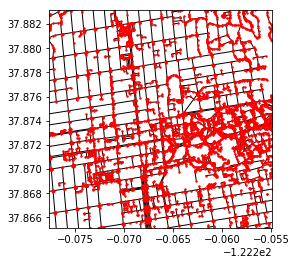

In [65]:
og = OsmGraph(37.874140, -122.266249, dist=1000)
nd1 = og.find_node(37.878442, -122.268996)
nd2 = og.find_node(37.867212, -122.263519)
path = nx.dijkstra_path(og.graph, nd1, nd2)
g = nx.subgraph(og.graph, path)
ax = og.draw_graph()
# og.draw_graph(graph=g, ax=ax, edge_color='r', width=2);

In [9]:
og.distance(nd1, nd2)

1334.079494766362

In [10]:
help(OsmGraph.distance)

Help on _lru_cache_wrapper in module osm_graph:

distance(self, nd1, nd2)



In [24]:
g.nodes

NodeView((275806209, 1941701122, 4168189957, 5483224070, 4279441419, 2308943891, 2308943892, 53091866, 239669276, 5483224097, 5483224098, 239669288, 234653238, 239669302, 2281374264, 259581502, 2086696513, 2086696521, 6561896527, 6561896528, 2086696540, 2086696562, 1027296388, 53096078, 53096079, 53096083, 53096084, 53096087, 53096090, 3516403894, 239616695, 3516403898, 230987450, 53050568, 3793693384, 3793693385, 3793693387, 53055193, 2308944092, 2086696681, 2398630635, 2086696684, 260541180, 260541181, 6937963283, 279995676, 2296460579, 2880800566, 2880800580, 540985159, 4238979919, 4238979924, 4506652502, 4506652503, 4238979933, 4238979937, 1955175271, 4238979946, 6410508152, 6410508154, 4240959867, 4238979968, 4226423170, 53072264, 4226423179, 3064295837, 318886307, 6938000297, 4240962990, 4240962995, 4188788148, 240448958, 53124035, 1941701074, 4168262107, 4168262110, 275806174, 53084126, 1941701093, 53093350, 53042665, 1941701103, 5483224049, 2504241144, 4168189946, 239669244))

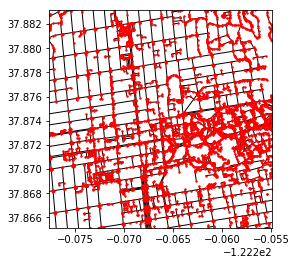

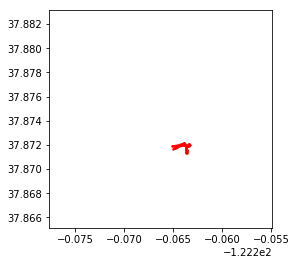

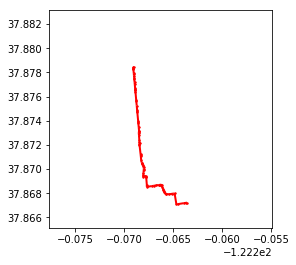

In [76]:
ax = og.draw_graph()
og.draw_graph(graph=rad, edge_color='r', width=2)
og.draw_graph(graph=g, edge_color='r', width=2)

In [29]:
help(OsmGraph.draw_graph)

Help on function draw_graph in module osm_graph:

draw_graph(self, figsize=(4, 4), graph=None, ax=None, **kwargs)



In [34]:
g.nodes

NodeView((275806209, 1941701122, 4168189957, 5483224070, 4279441419, 2308943891, 2308943892, 53091866, 239669276, 5483224097, 5483224098, 239669288, 234653238, 239669302, 2281374264, 259581502, 2086696513, 2086696521, 6561896527, 6561896528, 2086696540, 2086696562, 1027296388, 53096078, 53096079, 53096083, 53096084, 53096087, 53096090, 3516403894, 239616695, 3516403898, 230987450, 53050568, 3793693384, 3793693385, 3793693387, 53055193, 2308944092, 2086696681, 2398630635, 2086696684, 260541180, 260541181, 6937963283, 279995676, 2296460579, 2880800566, 2880800580, 540985159, 4238979919, 4238979924, 4506652502, 4506652503, 4238979933, 4238979937, 1955175271, 4238979946, 6410508152, 6410508154, 4240959867, 4238979968, 4226423170, 53072264, 4226423179, 3064295837, 318886307, 6938000297, 4240962990, 4240962995, 4188788148, 240448958, 53124035, 1941701074, 4168262107, 4168262110, 275806174, 53084126, 1941701093, 53093350, 53042665, 1941701103, 5483224049, 2504241144, 4168189946, 239669244))

In [58]:
for neighbor in og.graph.neighbors(2438953231):
    print(og.graph.edges[(2438953231,neighbor)])

{'weight': 5, 'foot': 'yes', 'highway': 'cycleway', 'name': 'Hilgard Way', 'oneway': 'no', 'tiger:cfcc': 'A41', 'tiger:county': 'Alameda, CA'}
{'weight': 6.956210871950037, 'ele': '71', 'gnis:county_id': '001', 'gnis:created': '01/01/1995', 'gnis:feature_id': '1656779', 'gnis:state_id': '06', 'highway': 'unclassified', 'junction': 'roundabout', 'name': 'West Circle', 'oneway': 'yes', 'sidewalk': 'right', 'surface': 'asphalt'}
{'weight': 5.716328074053461, 'ele': '71', 'gnis:county_id': '001', 'gnis:created': '01/01/1995', 'gnis:feature_id': '1656779', 'gnis:state_id': '06', 'highway': 'unclassified', 'junction': 'roundabout', 'name': 'West Circle', 'oneway': 'yes', 'sidewalk': 'right', 'surface': 'asphalt'}


In [66]:
og.graph.edges[(2438953231, 6609064728)]

{'foot': 'yes',
 'highway': 'cycleway',
 'name': 'Hilgard Way',
 'oneway': 'no',
 'tiger:cfcc': 'A41',
 'tiger:county': 'Alameda, CA',
 'weight': 5.809442497036227}

In [68]:
og.graph.

{'lat': 37.8718906, 'lon': -122.2636379}

In [73]:
rad = nx.ego_graph(G=og.graph, n=2438953231, radius=6)

In [77]:
help(OsmGraph.draw_graph)

Help on function draw_graph in module osm_graph:

draw_graph(self, figsize=(4, 4), graph=None, ax=None, **kwargs)



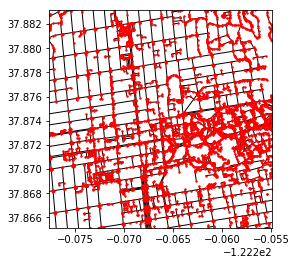

In [79]:
ax = og.draw_graph()

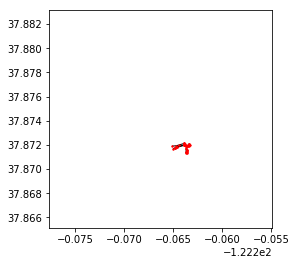

In [82]:
og.draw_graph(graph=rad)